# Machine Learning Assignment 1
# Jonathan Penaloza
# CS430
# Machine Learning in the Cloud

In [2]:
#from google.colab import drive
#url = 'https://colab.research.google.com/drive/1NC8j7HqlIcwHJT1sMiuU7P6oV8NccJNR?usp=sharing'
#drive.mount(url)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### 4.

In [3]:
df = pd.read_csv("weather_2012.csv")

#### 5.

In [4]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [6]:
df.sample()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
644,2012-01-27 20:00:00,-0.7,-2.7,86,32,16.1,99.54,Cloudy


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           8784 non-null   object 
 1   Temp (C)            8784 non-null   float64
 2   Dew Point Temp (C)  8784 non-null   float64
 3   Rel Hum (%)         8784 non-null   int64  
 4   Wind Spd (km/h)     8784 non-null   int64  
 5   Visibility (km)     8784 non-null   float64
 6   Stn Press (kPa)     8784 non-null   float64
 7   Weather             8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
df = df.rename(
    columns={
        'Date/Time':'date_time',
        'Temp (C)':'temp_c',
        'Dew Point Temp (C)':'dew_point',
        'Rel Hum (%)':'relative_humidity', 
        'Wind Spd (km/h)':'wind_speed', 
        'Visibility (km)':'pressure',
        'Weather':'weather'}) 

#### 6.

In [12]:
df.columns

Index(['date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed',
       'pressure', 'Stn Press (kPa)', 'weather'],
      dtype='object')

In [13]:
df['temp_f'] = df['temp_c']* 9/5 + 32

In [14]:
temp_f = df.pop('temp_f')
df.insert(1, 'temp_f', temp_f)

#### 7.

In [15]:
df

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,pressure,Stn Press (kPa),weather
0,2012-01-01 00:00:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,32.18,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,32.36,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,31.10,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,31.64,-0.2,-1.8,89,28,9.7,99.91,Snow


#### 8.

In [9]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,pressure,Stn Press (kPa)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


#### 9.

In [16]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [17]:
df

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,pressure,Stn Press (kPa),weather
0,2012-01-01 00:00:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,32.18,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,32.36,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,31.10,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,31.64,-0.2,-1.8,89,28,9.7,99.91,Snow


#### 10.

In [18]:
monthly_avg = df.groupby(pd.PeriodIndex(df['date_time'], freq="M"))['temp_f'].mean().reset_index()
monthly_avg

,date_time,temp_f
0,2012-01,18.731290
1,2012-02,24.395000
2,2012-03,37.618226
3,2012-04,44.616750
4,2012-05,61.227984
5,2012-06,68.241250
6,2012-07,73.022097
7,2012-08,72.102742
8,2012-09,61.672000
9,2012-10,51.718952


#### 11.

In [30]:
df.dtypes

date_time            datetime64[ns]
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
pressure                    float64
Stn Press (kPa)             float64
weather                      object
dtype: object

#### 12.

In [19]:
df['date_time'] = pd.to_datetime(df['date_time'], infer_datetime_format=True)
df.dtypes

C:\Users\jonat\AppData\Local\Temp\ipykernel_22240\463274380.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_time'] = pd.to_datetime(df['date_time'], infer_datetime_format=True)


date_time            datetime64[ns]
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
pressure                    float64
Stn Press (kPa)             float64
weather                      object
dtype: object

#### 13.

In [20]:
monthly_avg = df.groupby(pd.PeriodIndex(df['date_time'], freq="M"))['temp_f'].mean().reset_index()
monthly_avg

,date_time,temp_f
0,2012-01,18.731290
1,2012-02,24.395000
2,2012-03,37.618226
3,2012-04,44.616750
4,2012-05,61.227984
5,2012-06,68.241250
6,2012-07,73.022097
7,2012-08,72.102742
8,2012-09,61.672000
9,2012-10,51.718952


In [21]:
monthly_avg.date_time = monthly_avg.date_time.astype('int64')
monthly_avg

,date_time,temp_f
0,504,18.731290
1,505,24.395000
2,506,37.618226
3,507,44.616750
4,508,61.227984
5,509,68.241250
6,510,73.022097
7,511,72.102742
8,512,61.672000
9,513,51.718952


In [22]:
df

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,pressure,Stn Press (kPa),weather
0,2012-01-01 00:00:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,32.18,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,32.36,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,31.10,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,31.64,-0.2,-1.8,89,28,9.7,99.91,Snow


#### 14.

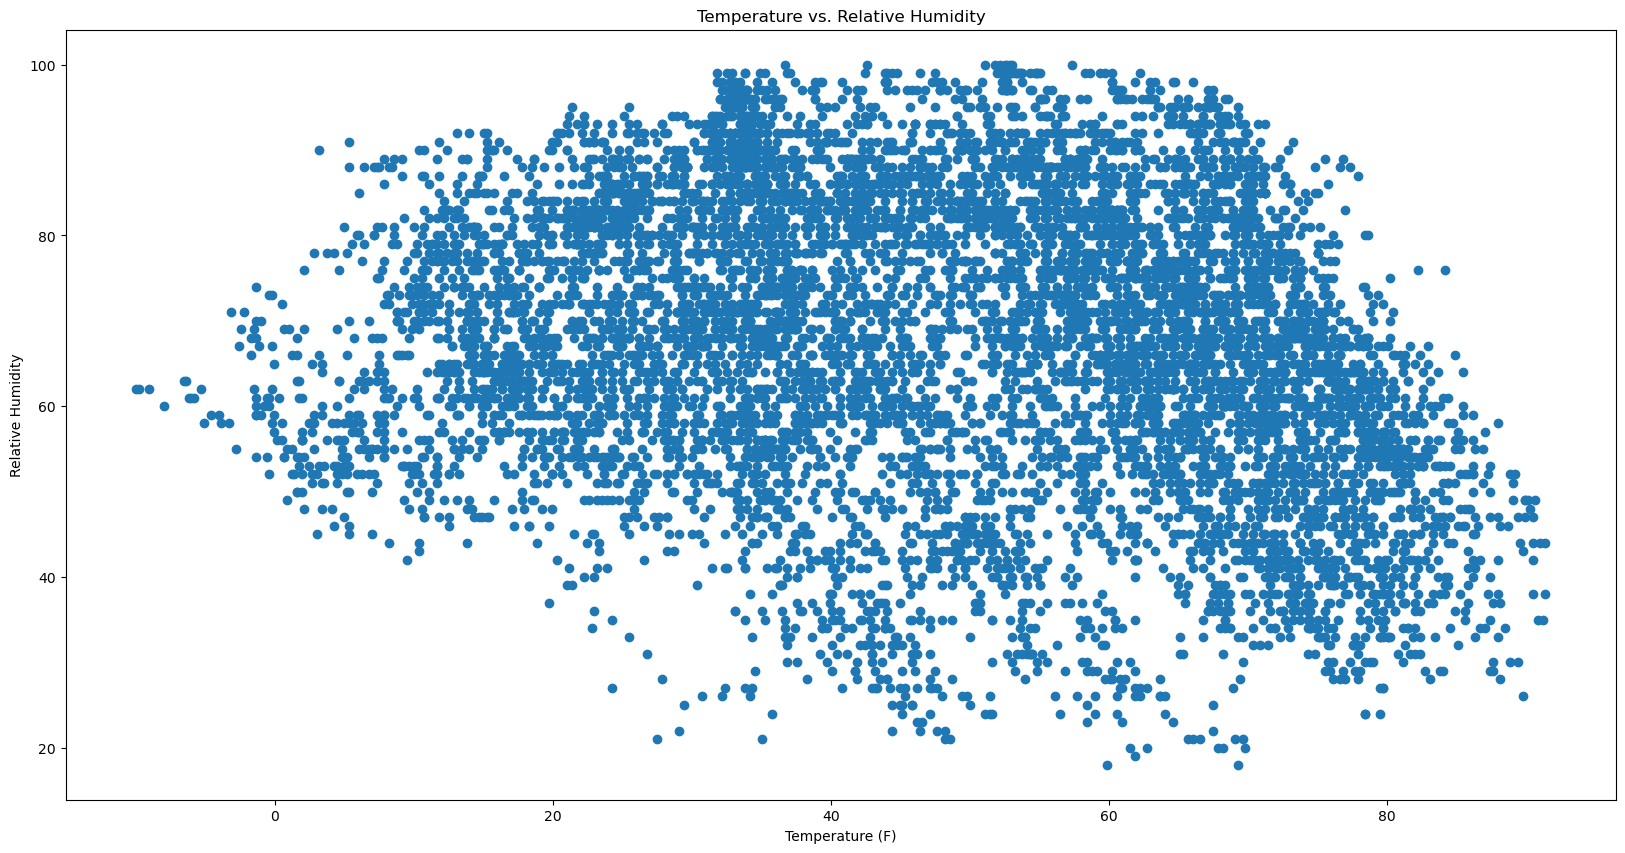

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(df.temp_f, df.relative_humidity)
plt.title("Temperature vs. Relative Humidity")
plt.xlabel("Temperature (F)")
plt.ylabel("Relative Humidity")
plt.show()

#### 15.

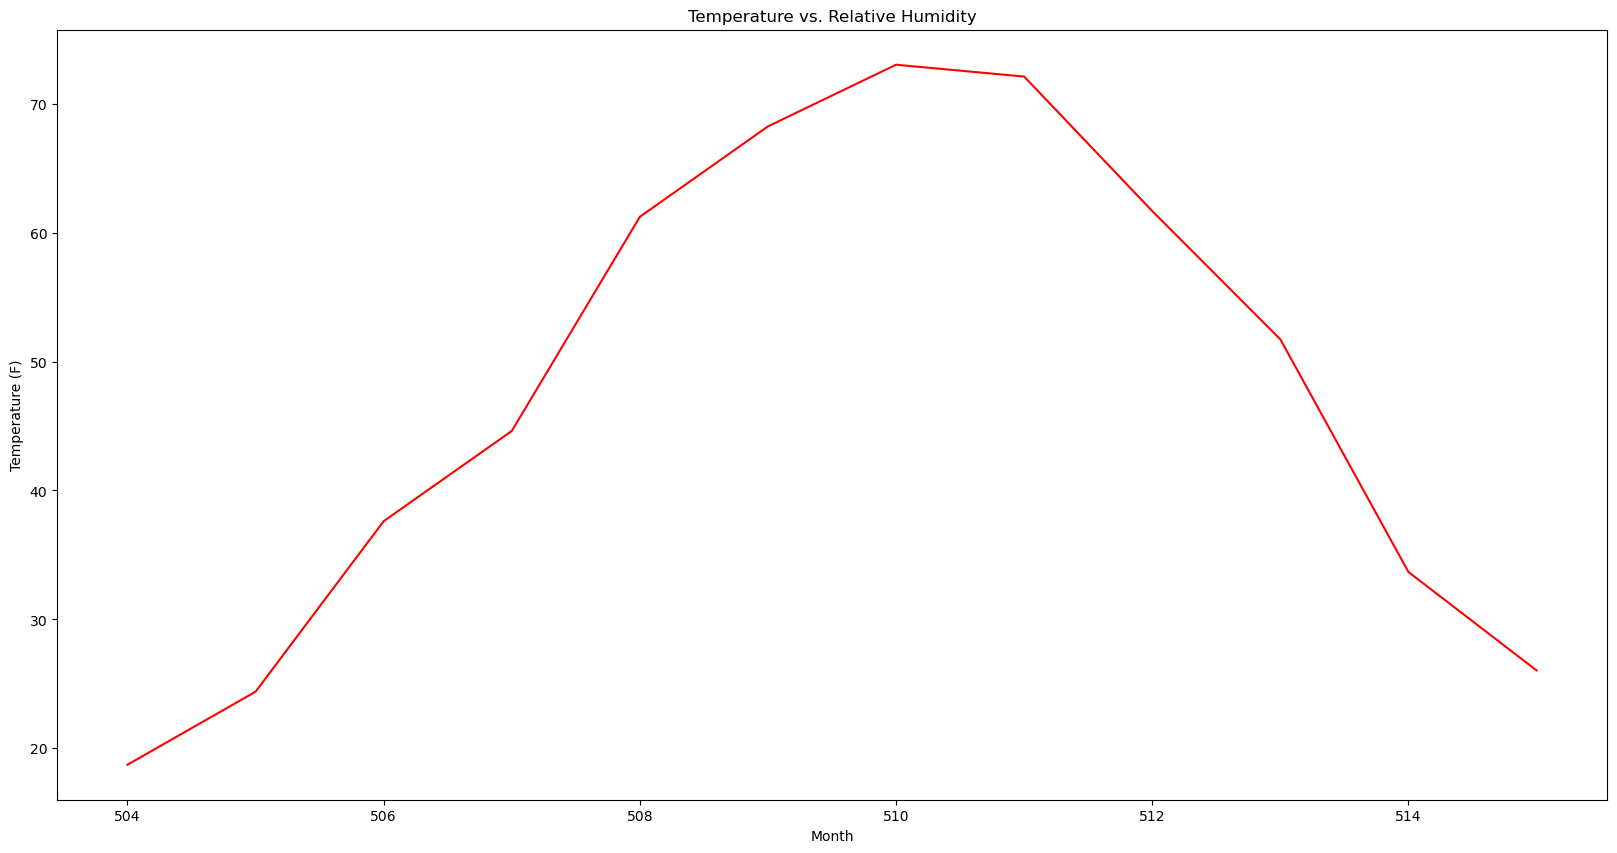

In [24]:
plt.figure(figsize=(20,10))
plt.plot(monthly_avg.date_time, monthly_avg.temp_f,color = 'red')
plt.title("Temperature vs. Relative Humidity")
plt.ylabel("Temperature (F)")
plt.xlabel("Month")
plt.show()

In [25]:
df.columns

Index(['date_time', 'temp_f', 'temp_c', 'dew_point', 'relative_humidity',
       'wind_speed', 'pressure', 'Stn Press (kPa)', 'weather'],
      dtype='object')

#### 16.

In [27]:
box = df.drop(columns=['date_time','weather'])
box

,temp_f,temp_c,dew_point,relative_humidity,wind_speed,pressure,Stn Press (kPa)
0,28.76,-1.8,-3.9,86,4,8.0,101.24
1,28.76,-1.8,-3.7,87,4,8.0,101.24
2,28.76,-1.8,-3.4,89,7,4.0,101.26
3,29.30,-1.5,-3.2,88,6,4.0,101.27
4,29.30,-1.5,-3.3,88,7,4.8,101.23
...,...,...,...,...,...,...,...
8779,32.18,0.1,-2.7,81,30,9.7,100.13
8780,32.36,0.2,-2.4,83,24,9.7,100.03
8781,31.10,-0.5,-1.5,93,28,4.8,99.95
8782,31.64,-0.2,-1.8,89,28,9.7,99.91


In [28]:
box.astype(float)

,temp_f,temp_c,dew_point,relative_humidity,wind_speed,pressure,Stn Press (kPa)
0,28.76,-1.8,-3.9,86.0,4.0,8.0,101.24
1,28.76,-1.8,-3.7,87.0,4.0,8.0,101.24
2,28.76,-1.8,-3.4,89.0,7.0,4.0,101.26
3,29.30,-1.5,-3.2,88.0,6.0,4.0,101.27
4,29.30,-1.5,-3.3,88.0,7.0,4.8,101.23
...,...,...,...,...,...,...,...
8779,32.18,0.1,-2.7,81.0,30.0,9.7,100.13
8780,32.36,0.2,-2.4,83.0,24.0,9.7,100.03
8781,31.10,-0.5,-1.5,93.0,28.0,4.8,99.95
8782,31.64,-0.2,-1.8,89.0,28.0,9.7,99.91


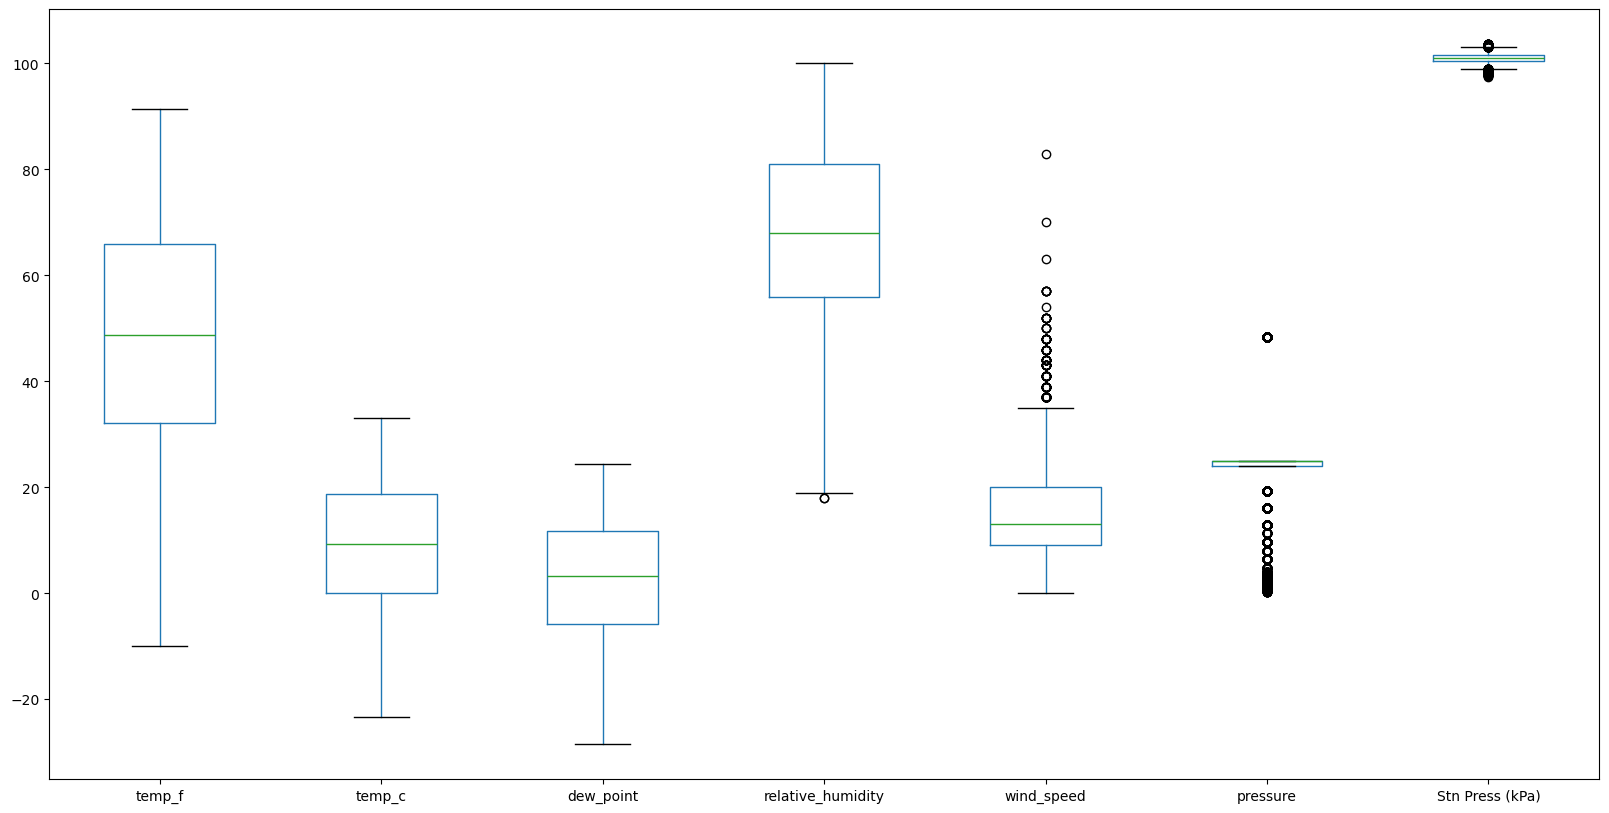

In [29]:
plt.figure(figsize=(20,10))
box.boxplot().grid(False)